In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv (r'C:\Users\Nick\Downloads\Melbourne_House_price\Melbourne_housing_FULL.csv')

df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
clean_df = df.drop(columns=['Address','SellerG','YearBuilt','Propertycount','Method','Lattitude','Longtitude','BuildingArea','Distance','Suburb','Postcode'])

In [4]:
clean_df.isnull().sum()

Rooms              0
Type               0
Price           7610
Date               0
Bedroom2        8217
Bathroom        8226
Car             8728
Landsize       11810
CouncilArea        3
Regionname         3
dtype: int64

In [5]:
clean_df["Bedroom2"].value_counts

<bound method IndexOpsMixin.value_counts of 0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
34852    4.0
34853    2.0
34854    2.0
34855    NaN
34856    2.0
Name: Bedroom2, Length: 34857, dtype: float64>

In [6]:
py.sqrt(sum((clean_df[~clean_df["Price"].isna()]["Price"] - clean_df[~clean_df["Price"].isna()]["Price"].mean()) **2) / len(clean_df[~clean_df["Price"].isna()]["Price"]))

641455.3586615821

In [7]:
clean_df["Date"].dt.month.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [8]:
clean_df[clean_df.Car.isna()]


,Rooms,Type,Price,Date,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
15,3,h,1000000.0,8/10/2016,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan
16,2,t,745000.0,8/10/2016,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan
19,2,u,542000.0,8/10/2016,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan
21,2,u,760000.0,10/12/2016,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan
22,1,u,481000.0,10/12/2016,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...
34840,2,u,520000.0,24/02/2018,NaN,NaN,NaN,NaN,Hobsons Bay City Council,Western Metropolitan
34842,3,h,1400000.0,24/02/2018,3.0,2.0,NaN,325.0,Hobsons Bay City Council,Western Metropolitan
34844,1,u,440000.0,24/02/2018,NaN,NaN,NaN,NaN,Port Phillip City Council,Southern Metropolitan
34851,3,h,1101000.0,24/02/2018,3.0,1.0,NaN,288.0,Maribyrnong City Council,Western Metropolitan


In [9]:
new_df = clean_df[~(clean_df["Landsize"] == clean_df["Landsize"].max())].copy()
new_df


,Rooms,Type,Price,Date,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
0,2,h,NaN,3/09/2016,2.0,1.0,1.0,126.0,Yarra City Council,Northern Metropolitan
1,2,h,1480000.0,3/12/2016,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan
2,2,h,1035000.0,4/02/2016,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan
3,3,u,NaN,4/02/2016,3.0,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan
4,3,h,1465000.0,4/03/2017,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,24/02/2018,4.0,1.0,3.0,593.0,Maribyrnong City Council,Western Metropolitan
34853,2,h,888000.0,24/02/2018,2.0,2.0,1.0,98.0,Maribyrnong City Council,Western Metropolitan
34854,2,t,705000.0,24/02/2018,2.0,1.0,2.0,220.0,Maribyrnong City Council,Western Metropolitan
34855,3,h,1140000.0,24/02/2018,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan


In [10]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.0,2.0,3.0,4.0,16.0
Price,27246.0,1.050113e+06,641401.023306,85000.0,635000.0,870000.0,1295000.0,11200000.0
Bedroom2,26639.0,3.084650e+00,0.980708,0.0,2.0,3.0,4.0,30.0
Bathroom,26630.0,1.624747e+00,0.724177,0.0,1.0,2.0,2.0,12.0
Car,26128.0,1.728873e+00,1.010780,0.0,1.0,2.0,2.0,26.0
Landsize,23046.0,5.748356e+02,1854.255626,0.0,224.0,521.0,670.0,146699.0


<AxesSubplot:>

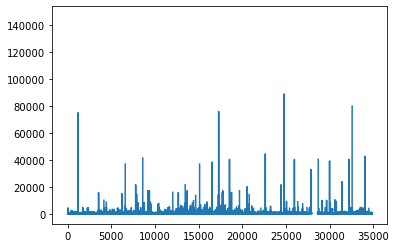

In [11]:
new_df["Landsize"].plot()

In [12]:
new_df = new_df.drop(columns=['Rooms','Date','CouncilArea'])

In [13]:
new_df["Landsize"].mean()

574.8356330816628

In [14]:
new_df["Landsize"] = new_df["Landsize"].fillna(575)

In [15]:
new_df['Car'] = new_df['Car'].fillna(1.0)

In [16]:
new_df['Bedroom2'] = new_df['Bedroom2'].fillna(1.0)
new_df['Bathroom'] = new_df['Bathroom'].fillna(1.0)

In [17]:
new_df.isnull().sum()

Type             0
Price         7610
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Regionname       3
dtype: int64

In [18]:
new_df = new_df.dropna()

In [19]:
print (new_df.shape)

(27243, 7)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


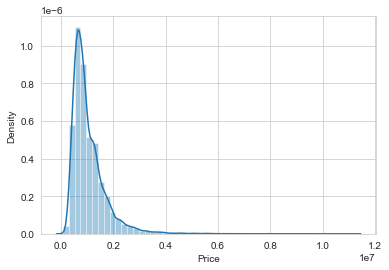

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


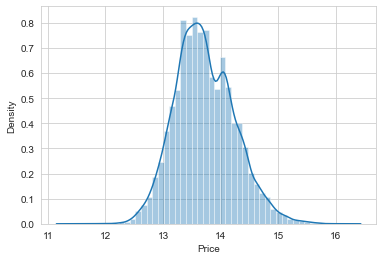

In [20]:
x = clean_df.Price
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

clean_df["Price"] = py.log(clean_df.Price)
x = clean_df.Price
sns.distplot(x)
plt.show()

In [21]:
new_df["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [22]:
new_df

,Type,Price,Bedroom2,Bathroom,Car,Landsize,Regionname
1,h,1480000.0,2.0,1.0,1.0,202.0,Northern Metropolitan
2,h,1035000.0,2.0,1.0,0.0,156.0,Northern Metropolitan
4,h,1465000.0,3.0,2.0,0.0,134.0,Northern Metropolitan
5,h,850000.0,3.0,2.0,1.0,94.0,Northern Metropolitan
6,h,1600000.0,3.0,1.0,2.0,120.0,Northern Metropolitan
...,...,...,...,...,...,...,...
34852,h,1480000.0,4.0,1.0,3.0,593.0,Western Metropolitan
34853,h,888000.0,2.0,2.0,1.0,98.0,Western Metropolitan
34854,t,705000.0,2.0,1.0,2.0,220.0,Western Metropolitan
34855,h,1140000.0,1.0,1.0,1.0,575.0,Western Metropolitan


In [23]:
new_df.isnull().sum()

Type          0
Price         0
Bedroom2      0
Bathroom      0
Car           0
Landsize      0
Regionname    0
dtype: int64

In [ ]:
from wordcloud import WordCloud

# Beer Nmae
beer_name = new_df['Regionname']
beer_name = pd.DataFrame(beer_name)
beer_name.columns = ['Regionname']
beer_name = beer_name.dropna(axis=0, how='all')
wordcloud = WordCloud().generate(' '.join(beer_name['Regionname']))

# Generate plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
categorical_vars = list(new_df.columns[new_df.dtypes == object].values)
obj_df = new_df.select_dtypes(include=['object']).copy() #copy so u dont change the original df
obj_df.head()

map_dict = {col: {n: cat for n, cat in enumerate(obj_df[col].astype('category').cat.categories)} for col in obj_df}
#eer_style_dict = {value:key for key, value in convert_cats['beer_style'].items()}
obj_df = pd.DataFrame({col: obj_df[col].astype('category').cat.codes for col in obj_df}, index=obj_df.index)
import json

with open('categorical_vars.json', 'w') as fp:
    json.dump(map_dict, fp)

In [25]:
new_df.drop(categorical_vars,axis=1,inplace=True) #drop transformed original features
model_data= pd.concat([new_df.copy(), obj_df],axis=1)
model_data.shape

(27243, 7)

In [26]:
model_data

,Price,Bedroom2,Bathroom,Car,Landsize,Type,Regionname
1,1480000.0,2.0,1.0,1.0,202.0,0,2
2,1035000.0,2.0,1.0,0.0,156.0,0,2
4,1465000.0,3.0,2.0,0.0,134.0,0,2
5,850000.0,3.0,2.0,1.0,94.0,0,2
6,1600000.0,3.0,1.0,2.0,120.0,0,2
...,...,...,...,...,...,...,...
34852,1480000.0,4.0,1.0,3.0,593.0,0,6
34853,888000.0,2.0,2.0,1.0,98.0,0,6
34854,705000.0,2.0,1.0,2.0,220.0,1,6
34855,1140000.0,1.0,1.0,1.0,575.0,0,6


In [27]:
obj_df

,Type,Regionname
1,0,2
2,0,2
4,0,2
5,0,2
6,0,2
...,...,...
34852,0,6
34853,0,6
34854,1,6
34855,0,6


In [36]:
model_data

,Price,Bedroom2,Bathroom,Car,Landsize,Type,Regionname
1,1480000.0,2.0,1.0,1.0,202.0,0,2
2,1035000.0,2.0,1.0,0.0,156.0,0,2
4,1465000.0,3.0,2.0,0.0,134.0,0,2
5,850000.0,3.0,2.0,1.0,94.0,0,2
6,1600000.0,3.0,1.0,2.0,120.0,0,2
...,...,...,...,...,...,...,...
34852,1480000.0,4.0,1.0,3.0,593.0,0,6
34853,888000.0,2.0,2.0,1.0,98.0,0,6
34854,705000.0,2.0,1.0,2.0,220.0,1,6
34855,1140000.0,1.0,1.0,1.0,575.0,0,6


In [45]:
mean_L = model_data["Landsize"].mean()
_std= model_data["Landsize"].std()
(model_data["Landsize"] - mean_L) / _std

1       -0.235783
2       -0.265150
4       -0.279195
5       -0.304731
6       -0.288133
           ...   
34852    0.013834
34853   -0.302178
34854   -0.224292
34855    0.002343
34856   -0.205140
Name: Landsize, Length: 27243, dtype: float64

In [37]:
X = model_data.iloc[:, 1:].values
y = model_data.iloc[:, 0].values

In [39]:
X

array([[  2.,   1.,   1., 202.,   0.,   2.],
       [  2.,   1.,   0., 156.,   0.,   2.],
       [  3.,   2.,   0., 134.,   0.,   2.],
       ...,
       [  2.,   1.,   2., 220.,   1.,   6.],
       [  1.,   1.,   1., 575.,   0.,   6.],
       [  2.,   1.,   0., 250.,   0.,   6.]])

In [40]:
y

array([1480000., 1035000., 1465000., ...,  705000., 1140000., 1020000.])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [49]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', py.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 295072.1765932269
Mean Squared Error: 212139574036.50092
Root Mean Squared Error: 460586.1201083907


In [53]:
def save_model(model_name, model):
    import pickle
    '''
    model_name = name.pkl
    joblib.load('name.pkl')
    assign a variable to load model
    '''
    with open(str(model_name), 'wb') as f:
        pickle.dump(model, f)

In [54]:
#save scaling model
save_model('scaler.pkl',sc)

In [55]:
#save forest model
save_model('regressor.pkl',regressor)

In [ ]:
Postcode_2016 = postcode_clean[(postcode_clean['Date']> "2016-01-01") & (postcode_clean['Date']< "2017-01-01")]

In [ ]:
Postcode_2016_AVG = Postcode_2016.groupby("Postcode").mean()

In [ ]:
Postcode_2017 = postcode_clean[(postcode_clean['Date']> "2017-01-01") & (postcode_clean['Date']< "2018-01-01")]

In [ ]:
Postcode_2017_AVG = Postcode_2017.groupby("Postcode").mean()

In [ ]:
Postcode_2018 = postcode_clean[(postcode_clean['Date']> "2018-01-01") & (postcode_clean['Date']< "2019-01-01")]

In [ ]:
Postcode_2018_AVG = Postcode_2018.groupby("Postcode").mean()

In [ ]:
column_names = ["AVG Price 2016","AVG Price 2017","AVG Price 2018"]
Joined = pd.DataFrame(columns = column_names)

In [ ]:
Joined['AVG Price 2016'] = Postcode_2016_AVG["Price"]
Joined['AVG Price 2017'] = Postcode_2017_AVG["Price"]
Joined['AVG Price 2018'] = Postcode_2018_AVG["Price"]

In [ ]:
Joined.to_csv('Average.csv')

In [ ]:
Joined = Joined.reset_index()

In [ ]:
Joined.dtypes

In [ ]:
Joined


In [62]:
#ORDER OFF INPUTS
model_data.iloc[0][1:].index

Index(['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Type', 'Regionname'], dtype='object')

In [69]:
model_data.iloc[0][1:].values

array([  2.,   1.,   1., 202.,   0.,   2.])

In [66]:
import pickle
price_model = pickle.load(open("regressor.pkl", 'rb'))
input_scaler = pickle.load(open('scaler.pkl','rb'))

In [70]:
with open('categorical_vars.json') as f:
    convert_cats = json.load(f)

In [73]:
user_input = [2,1,1,1000,"h", 'Eastern Victoria']

In [72]:
convert_cats

{'Type': {'0': 'h', '1': 't', '2': 'u'},
 'Regionname': {'0': 'Eastern Metropolitan',
  '1': 'Eastern Victoria',
  '2': 'Northern Metropolitan',
  '3': 'Northern Victoria',
  '4': 'South-Eastern Metropolitan',
  '5': 'Southern Metropolitan',
  '6': 'Western Metropolitan',
  '7': 'Western Victoria'}}

In [76]:
user_input[user_input.index("h")]

'h'

In [78]:
type_dict = {value:key for key, value in convert_cats['Type'].items()}
type_ = int(type_dict[str(user_input[user_input.index("h")])])

In [79]:
type_

0

In [80]:
region_dict = {value:key for key, value in convert_cats['Regionname'].items()}
region = int(region_dict[str(user_input[user_input.index('Eastern Victoria')])])

In [81]:
region

1

In [82]:
user_input[user_input.index("h")] = type_
user_input[user_input.index('Eastern Victoria')] = region

In [83]:
user_input

[2, 1, 1, 1000, 0, 1]

In [86]:
scaled_features = input_scaler.transform([user_input])

In [88]:
price_model.predict(scaled_features)[0]

674077.8430253624

In [89]:
model_data.columns

Index(['Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Type',
       'Regionname'],
      dtype='object')

In [ ]:
def predict():
    '''
    For rendering results on HTML GUI
    '''
    with open('categorical_vars.json') as f:
        convert_cats = json.load(f)
    
    brewery_id = int(request.form['brewery_id'])
    review_aroma = float(request.form['review_aroma'])
    review_appearance = float(request.form['review_appearance'])
    review_palate = float(request.form['review_palate'])
    review_taste = float(request.form['review_taste'])
    beer_abv = float(request.form['beer_abv'])
    #convert categorical variables
    beer_style_dict = {value:key for key, value in convert_cats['beer_style'].items()}
    beer_style = int(beer_style_dict[str(request.form['beer_style'])])
    beer_name_dict = {value:key for key, value in convert_cats['beer_name'].items()}
    beer_name = int(beer_name_dict[str(request.form['beer_name'])])
    features = [[brewery_id, review_aroma, review_appearance, 
                review_palate,review_taste, beer_abv,
                beer_style, beer_name]]

    # features = [[int(x) for x in request.form.values()]]
    
    scale_features = beer_scaler.transform(features)
    output = beer_model.predict(scale_features)[0]
    print(prediction)
    
    return render_template('index.html', prediction_text='Your Rating is: {}'.format(output))

In [ ]:
 <div class="login">
	<h1>Predict Beer Ratings</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
      <input type="text" name="brewery_id" placeholder="Brewery ID" required="required" />
    	<input type="text" name="review_aroma" placeholder="Beer Aroma" required="required" />
      <input type="text" name="review_appearance" placeholder="Beer appearance" required="required" />
      <input type="text" name="review_palate" placeholder="Beer Palate" required="required" />
		  <input type="text" name="review_taste" placeholder="Beer Taste" required="required" />
      <input type="text" name="beer_abv" placeholder="Beer ABV Value" required="required" />
      <input type="text" name="beer_style" placeholder="Beer Style" required="required" />
      <input type="text" name="beer_name" placeholder="Beer Name" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

   <br>
   <br>
   {{prediction_text}}

 </div>


</body>
</html>